In [ ]:
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/FotosEjercicioML2/muestra2.csv" # Drive
# path = "D:/tesis especializacion datos/muestra2.csv" # Local

dfTransport = pd.read_csv(path,nrows=12500)
#dfTransport

#dfTransport = pd.read_csv(path)
dfTransport_aleatorio = dfTransport.sample(n=12500, random_state=random.seed())
dfTransport = dfTransport_aleatorio
print(dfTransport_aleatorio)
# small_df = pd.read_csv(path)
# print(small_df)


       OrgId  iVehicleID  iDriverID            dtTime   fLatitude  \
7459       9       18751      18748  20/11/2014 18:26  99.935.598   
2414       9         415          0   1/11/2014 14:06  45.233.612   
2906       9       30294      30294   6/11/2014 13:32   1.105.617   
9089       9       18797      18797  17/09/2014 22:16  46.815.829   
10742      9        8829          0  30/08/2014 11:02     103.845   
...      ...         ...        ...               ...         ...   
2117       9         168        331  10/09/2014 13:31  60.289.202   
10394      9       25446      25446   4/09/2014 19:46   1.095.328   
8156      11        1972          0  29/10/2014 16:48     344.417   
12107      9       12448      12443   3/10/2014 15:42  43.124.199   
4937       9       25438          0   7/09/2014 22:02     790.728   

        fLongitude  iAltitude  iHeading  ucSatellites       fHDOP  \
7459   -75.060.249        371       314            10         1.1   
2414    -7.411.972       2656    

Data exploring

In [ ]:
print(dfTransport.dtypes)


OrgId                      int64
iVehicleID                 int64
iDriverID                  int64
dtTime                    object
fLatitude                 object
fLongitude                object
iAltitude                  int64
iHeading                   int64
ucSatellites               int64
fHDOP                     object
liAgeOfReading             int64
liDistanceSinceReading     int64
ucVelocity                 int64
bIsAVL                      bool
dtype: object


In [ ]:
dfTransport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 7459 to 4937
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   OrgId                   12500 non-null  int64 
 1   iVehicleID              12500 non-null  int64 
 2   iDriverID               12500 non-null  int64 
 3   dtTime                  12500 non-null  object
 4   fLatitude               12500 non-null  object
 5   fLongitude              12500 non-null  object
 6   iAltitude               12500 non-null  int64 
 7   iHeading                12500 non-null  int64 
 8   ucSatellites            12500 non-null  int64 
 9   fHDOP                   12500 non-null  object
 10  liAgeOfReading          12500 non-null  int64 
 11  liDistanceSinceReading  12500 non-null  int64 
 12  ucVelocity              12500 non-null  int64 
 13  bIsAVL                  12500 non-null  bool  
dtypes: bool(1), int64(9), object(4)
memory usage: 1.3+ M

In [ ]:
dfTransport.describe()

,OrgId,iVehicleID,iDriverID,iAltitude,iHeading,ucSatellites,liAgeOfReading,liDistanceSinceReading,ucVelocity
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.00000,12500.000000,1.250000e+04,1.250000e+04,12500.00000
mean,16.219360,10171.263680,9187.911680,1295.197600,140.48816,9.333120,7.833905e+03,1.745527e+03,19.19104
std,30.988043,10059.808536,10749.562158,986.333142,116.92192,2.360313,3.546625e+05,7.922896e+04,21.24329
min,9.000000,1.000000,-13.000000,-101.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.00000
25%,9.000000,1031.000000,0.000000,304.000000,18.00000,8.000000,0.000000e+00,0.000000e+00,2.00000
50%,9.000000,8806.000000,3102.000000,1247.500000,130.00000,10.000000,0.000000e+00,0.000000e+00,11.00000
75%,9.000000,15447.000000,15581.000000,2504.000000,240.00000,11.000000,0.000000e+00,5.000000e+00,32.00000
max,153.000000,31703.000000,32513.000000,3888.000000,358.00000,12.000000,2.422990e+07,6.126600e+06,127.00000


Convirtiendo categóricas en numéricas

In [ ]:
# Convertir variables categóricas en variables numéricas
dfTransportDummies = pd.get_dummies(dfTransport)
dfTransportDummies

,OrgId,iVehicleID,iDriverID,iAltitude,iHeading,ucSatellites,liAgeOfReading,liDistanceSinceReading,ucVelocity,bIsAVL,...,fHDOP_81.999.998,fHDOP_83.999.996,fHDOP_86.999.998,fHDOP_9.5,fHDOP_91.000.004,fHDOP_93.000.002,fHDOP_93.999.996,fHDOP_96.000.004,fHDOP_96.999.998,fHDOP_98.000.002
7459,9,18751,18748,371,314,10,0,2,3,False,...,0,0,0,0,0,0,0,0,0,0
2414,9,415,0,2656,238,10,0,0,0,False,...,0,0,0,0,0,0,0,0,0,0
2906,9,30294,30294,21,60,10,0,1,5,False,...,0,0,0,0,0,0,0,0,0,0
9089,9,18797,18797,2587,282,8,0,0,1,True,...,0,0,0,0,0,0,0,0,0,0
10742,9,8829,0,18,0,9,1,0,0,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,9,168,331,1584,116,12,0,5,10,False,...,0,0,0,0,0,0,0,0,0,0
10394,9,25446,25446,43,282,11,1,0,2,False,...,0,0,0,0,0,0,0,0,0,0
8156,11,1972,0,1016,358,10,0,12,46,False,...,0,0,0,0,0,0,0,0,0,0
12107,9,12448,12443,160,286,12,0,0,20,False,...,0,0,0,0,0,0,0,0,0,0


Escalar las variables

OrgId                      int64
iVehicleID                 int64
iDriverID                  int64
dtTime                    object
fLatitude                 object
fLongitude                object
iAltitude                  int64
iHeading                   int64
ucSatellites               int64
fHDOP                     object
liAgeOfReading             int64
liDistanceSinceReading     int64
ucVelocity                 int64
bIsAVL                      bool
dtype: object

In [ ]:
# Escalar las variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfTransportScaled = scaler.fit_transform(dfTransportDummies)
dfTransportScaled

array([[-0.23298176,  0.85290684,  0.88938234, ..., -0.01549379,
        -0.00894463, -0.00894463],
       [-0.23298176, -0.96986478, -0.85475846, ..., -0.01549379,
        -0.00894463, -0.00894463],
       [-0.23298176,  2.00039009,  1.96351557, ..., -0.01549379,
        -0.00894463, -0.00894463],
       ...,
       [-0.16843816, -0.81508427, -0.85475846, ..., -0.01549379,
        -0.00894463, -0.00894463],
       [-0.23298176,  0.2263291 ,  0.30282336, ..., -0.01549379,
        -0.00894463, -0.00894463],
       [-0.23298176,  1.51765781, -0.85475846, ..., -0.01549379,
        -0.00894463, -0.00894463]])

In [ ]:
# Seleccionar subconjunto de columnas

# Selecciona las columnas numéricas
dfTransportNumeric = dfTransport.select_dtypes(include=['int64', 'float64'])
columnas = dfTransportNumeric.columns
columnas

dfTransportSubset = dfTransport[['liAgeOfReading', 'liDistanceSinceReading', 
                                 'ucVelocity']]

dfTransportScaled2 = scaler.fit_transform(dfTransportSubset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

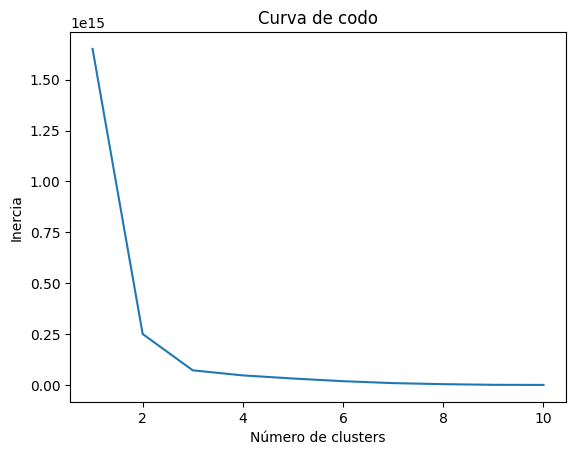

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar datos
#path = "/content/drive/MyDrive/FotosEjercicioML2/muestra2.csv"
#data = pd.read_csv(path)

# Crear una lista vacía para almacenar las inercias
inertias = []

X = dfTransportSubset # Obtener los valores de las columnas como un array NumPy
#y = data["liDistanceSinceReading"].values # Obtener los valores de la columna objetivo

# Probar con diferentes valores de k (número de clusters)
for k in range(1, 11):
    # Entrenar modelo de KMeans
    kmeans = KMeans(n_clusters=k, random_state=42).fit(dfTransportSubset)
    # Almacenar inercia
    inertias.append(kmeans.inertia_)

# Graficar la curva de codo
plt.plot(range(1, 11), inertias)
plt.title('Curva de codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

Para n_clusters = 2 El promedio de silhouette_score es: 0.9995667135765136
Para n_clusters = 3 El promedio de silhouette_score es: 0.9994855712451285
Para n_clusters = 4 El promedio de silhouette_score es: 0.9993378913972703
Para n_clusters = 5 El promedio de silhouette_score es: 0.9992360564940368
Para n_clusters = 6 El promedio de silhouette_score es: 0.998871946574412


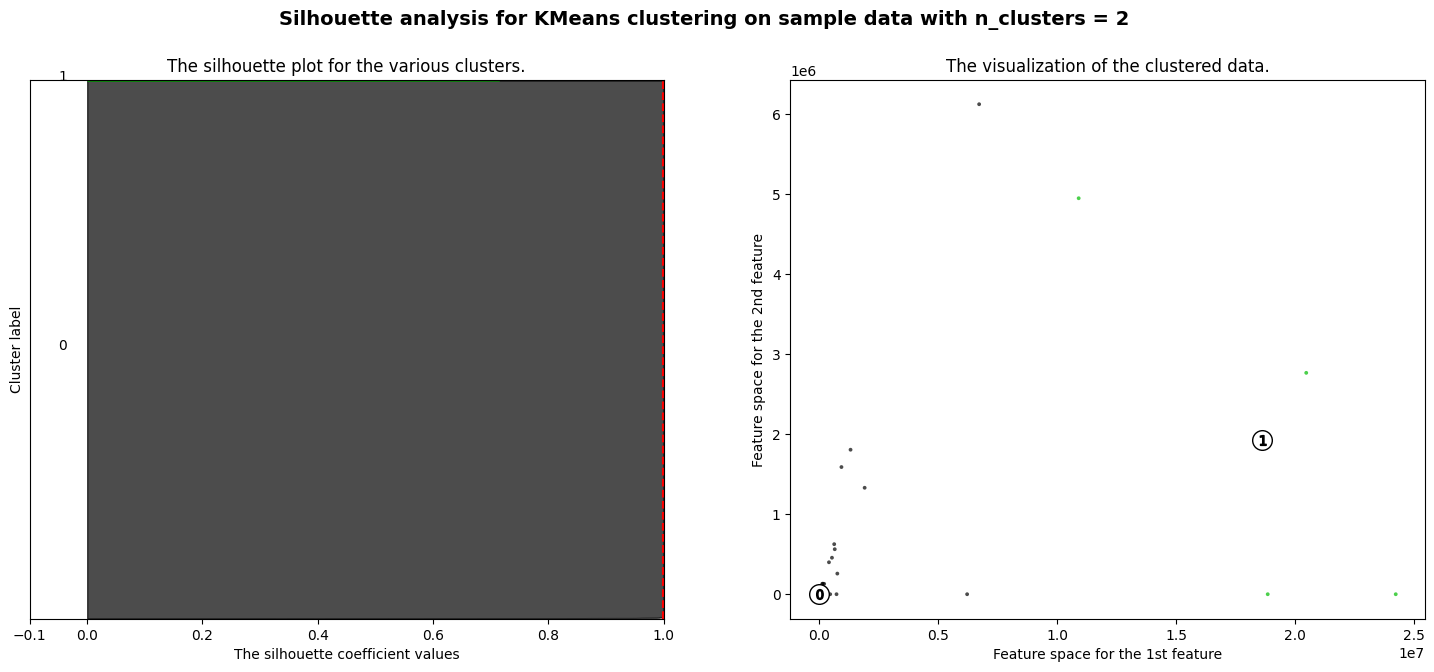

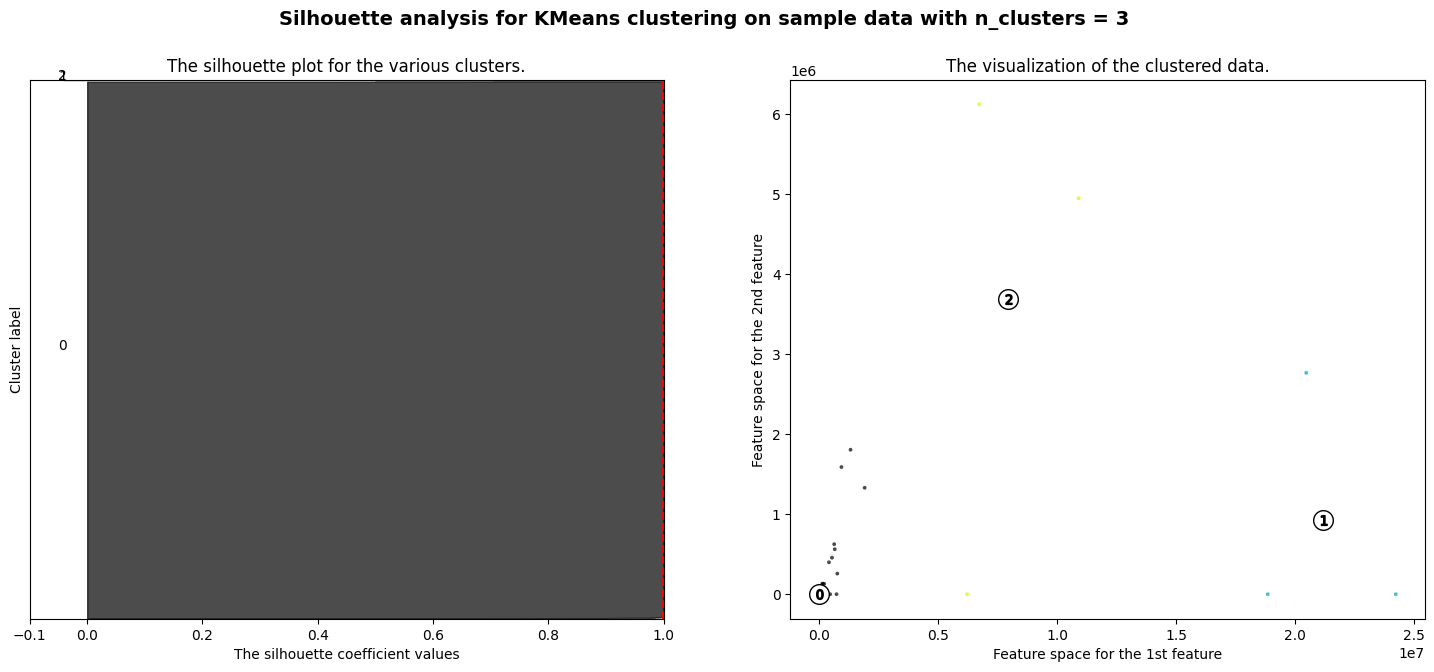

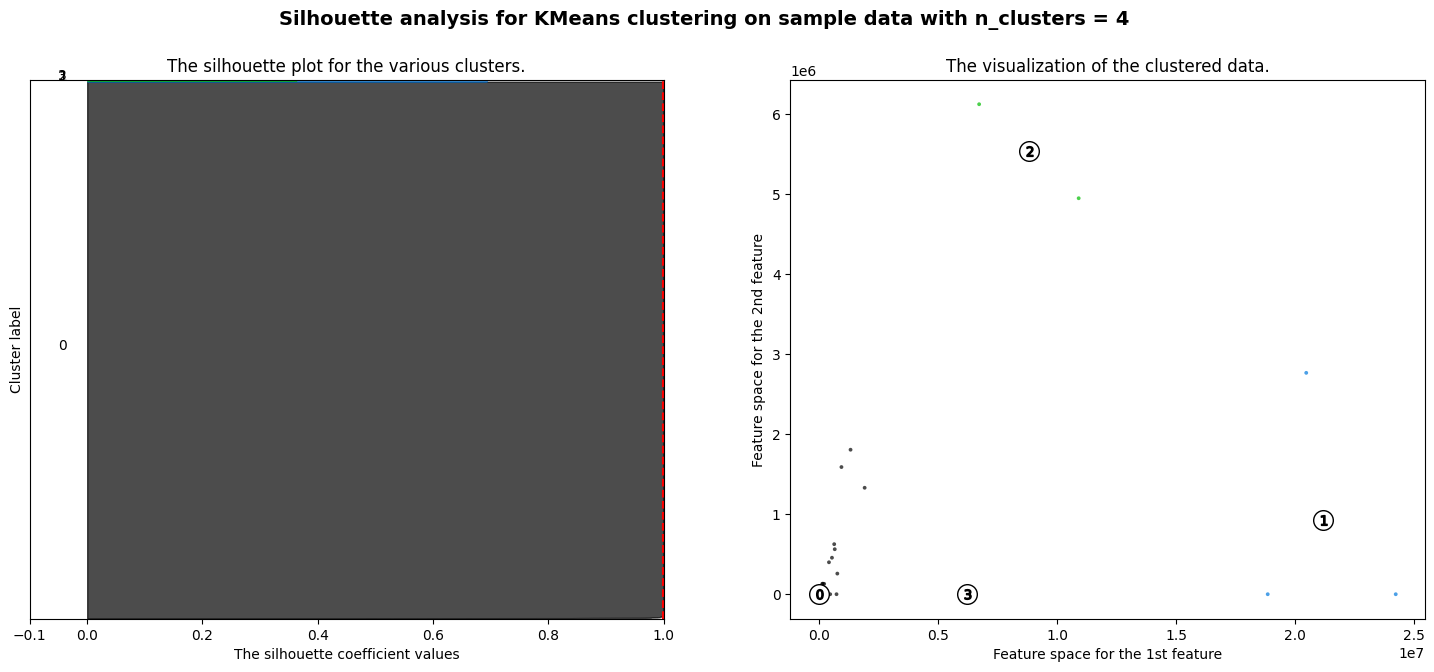

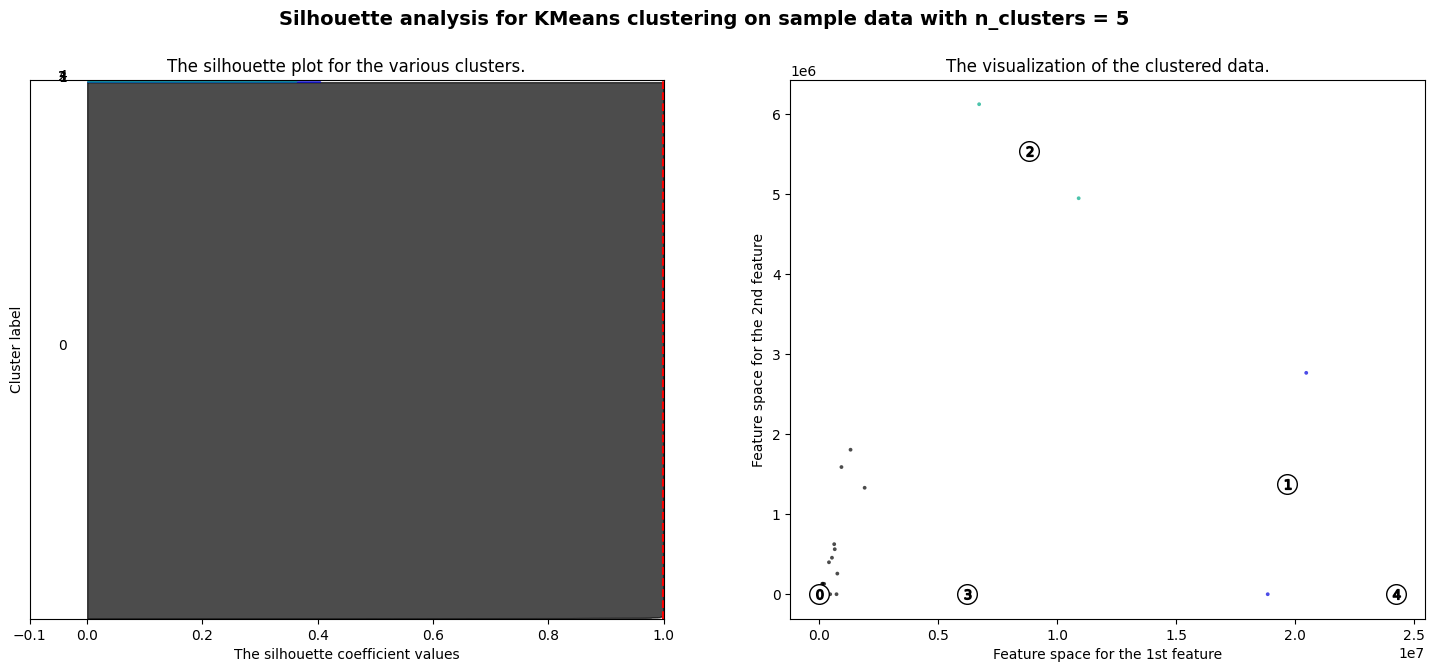

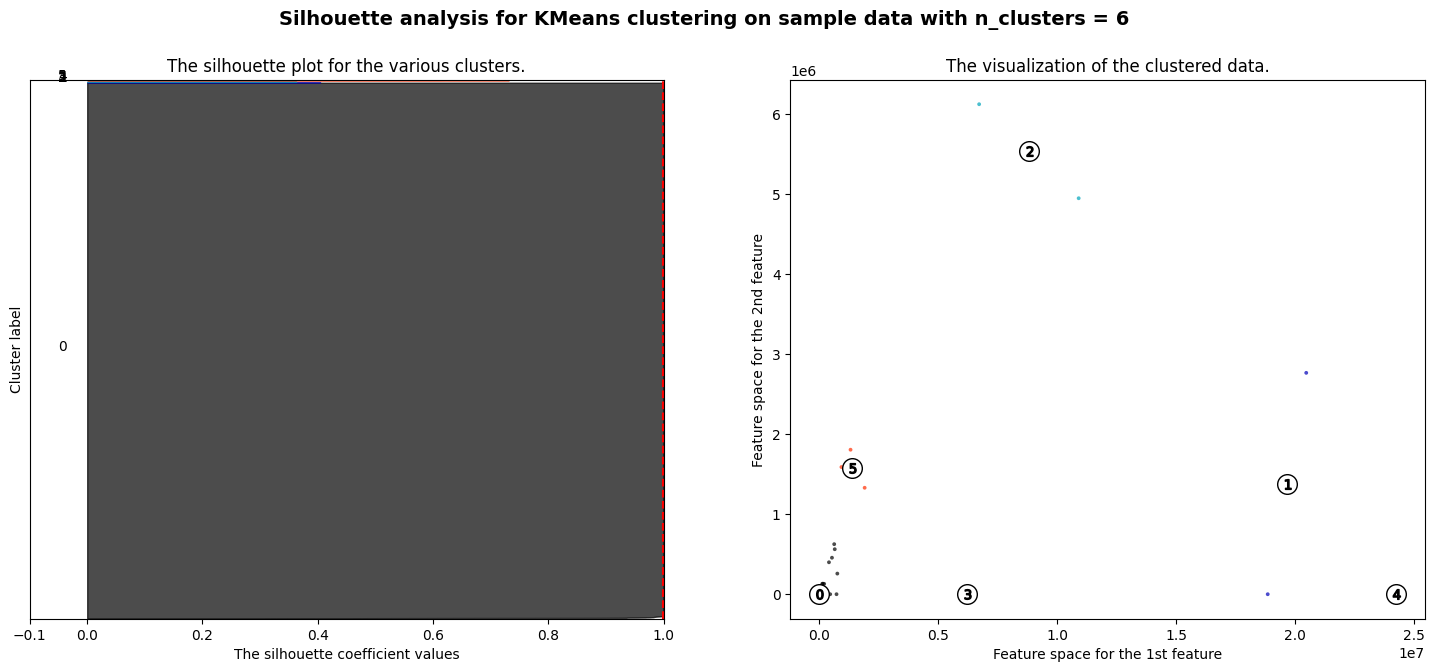

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

dfTransportNumeric = dfTransport.select_dtypes(include=['int64', 'float64'])
columnas = dfTransportNumeric.columns
columnas

dfTransportSubset = dfTransport[['liAgeOfReading', 'liDistanceSinceReading', 
                                 'ucVelocity']]

scaler = StandardScaler()
dfTransportScaled2 = scaler.fit_transform(dfTransportSubset)

# Generar datos de muestra utilizando make_blobs
# Este ajuste en particular tiene un único grupo y 3 grupos colocados juntos
# uno del otro.
X = dfTransportSubset.values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crear un subtrazado con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # El primer subtrazado es el trazado de la silueta
    # El coeficiente de silueta puede variar de -1 a 1 pero en este ejemplo todos
    # caen dentro de [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # El (n_clusters+1)*10 se utiliza para insertar espacios en blanco entre siluetas
    # trazados de grupos individuales, para demarcarlos claramente.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicializar el clusterer con el valor n_clusters y un generador aleatorio
    # semilla de 10 para reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # El silhouette_score da el valor promedio para todas las muestras.
    # Esto da una perspectiva de la densidad y separación de los grupos formados
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "El promedio de silhouette_score es:",
        silhouette_avg,
    )

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar los valores de silueta para las muestras que pertenecen a
        # el grupo i, y clasificarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Etiquetar los trazados de silueta con sus números de grupo en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular el nuevo valor
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#path = "/content/drive/MyDrive/FotosEjercicioML2/muestra2.csv"
#data = pd.read_csv(path)

X = dfTransportSubset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_

print(labels)


[0 0 0 ... 0 0 0]


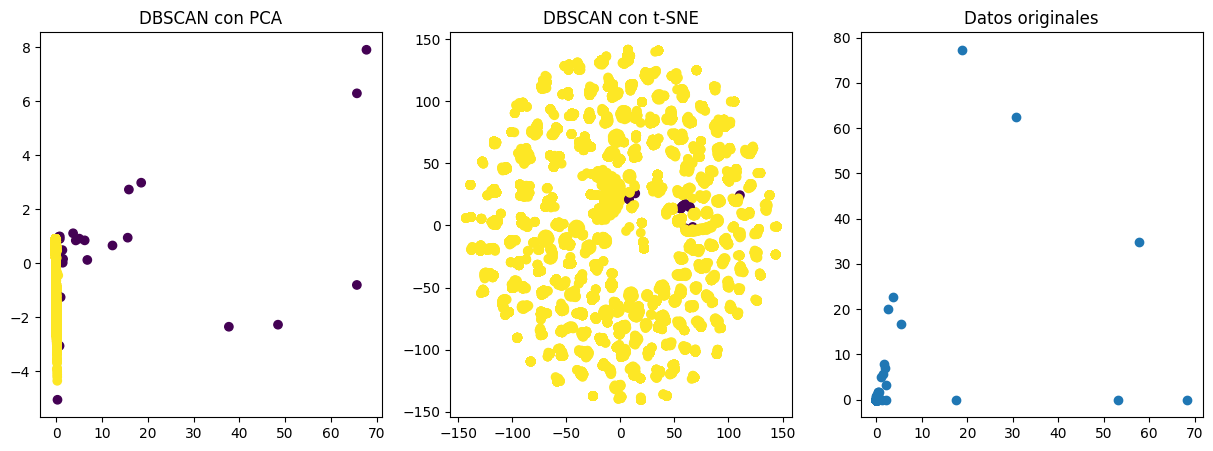

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Seleccionar las columnas que se utilizarán para el análisis
X = dfTransportSubset

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Obtener las etiquetas de los clusters
labels = dbscan.labels_

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reducir la dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Crear una figura con tres subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Graficar los resultados de DBSCAN en el primer subplot
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
axs[0].set_title('DBSCAN con PCA')

# Graficar los resultados de DBSCAN en el segundo subplot
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
axs[1].set_title('DBSCAN con t-SNE')

# Graficar los datos originales en el tercer subplot
axs[2].scatter(X_scaled[:, 0], X_scaled[:, 1])
axs[2].set_title('Datos originales')

# Mostrar la figura
plt.show()
